<a href="https://colab.research.google.com/github/Nickruti/Advanced_Python/blob/main/NaiveBayesClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

class GaussianNBClassifier:
    def __init__(self):
        pass

    def separate_classes(self, X, y):
      separated_classes = {}
      for i in range(len(X)):
          feature_values = X[i]
          class_name = y[i]
          if class_name not in separated_classes:
              separated_classes[class_name] = []
          separated_classes[class_name].append(feature_values)
      return separated_classes

    def summarize(self, X):
      for feature in zip(*X):
          yield {
              'stdev' : np.std(feature),
              'mean' : np.mean(feature)
          }
          
    def gauss_distribution_function(self, x, mean, stdev):
      exponent = np.exp(-((x-mean)**2 / (2*stdev**2)))
      return exponent / (np.sqrt(2*np.pi)*stdev)

    def fit(self, X, y):
      separated_classes = self.separate_classes(X, y)
      self.class_summary = {}
      for class_name, feature_values in separated_classes.items():
          self.class_summary[class_name] = {
              'prior_proba': len(feature_values)/len(X),
              'summary': [i for i in self.summarize(feature_values)],
          }     
      return self.class_summary

    def predict(self, X):
      MAPs = []
      for row in X:
          joint_proba = {}
          for class_name, features in self.class_summary.items():
              total_features = len(features['summary'])
              likelihood = 1
              for idx in range(total_features):
                  feature = row[idx]
                  mean = features['summary'][idx]['mean']
                  stdev = features['summary'][idx]['stdev']
                  normal_proba = self.gauss_distribution_function(feature, \
                  mean, stdev)
                  likelihood *= normal_proba
              prior_proba = features['prior_proba']
              joint_proba[class_name] = prior_proba * likelihood
          MAP = max(joint_proba, key=joint_proba.get)
          MAPs.append(MAP)
      return MAPs

    def accuracy(self, y_test, y_pred):
      true_true = 0
      for y_t, y_p in zip(y_test, y_pred):
          if y_t == y_p:
              true_true += 1
      return true_true / len(y_test)

In [ ]:
import pandas as pd

data = pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')
data.Gender[data.Gender == 'Male'] = 1
data.Gender[data.Gender == 'Female'] = 2
print(data)


    Gender  Height  Weight  Index
0        1     174      96      4
1        1     189      87      2
2        2     185     110      4
3        2     195     104      3
4        1     149      61      3
..     ...     ...     ...    ...
495      2     150     153      5
496      2     184     121      4
497      2     141     136      5
498      1     150      95      5
499      1     173     131      5

[500 rows x 4 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [58]:
y = list(map(lambda v: '1' if v == 0 or v == 5 else '0', data['Index'].values)) # target values as string

X = data[['Gender', 'Height', 'Weight']].values # features values

y_train = y[:350]
y_val = y[350:]

X_train = X[:350]
X_val = X[350:]

In [59]:
model = GaussianNBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print ("GaussianNBClassifier accuracy: {0:.3f}".format(model.accuracy(y_val, y_pred)))

GaussianNBClassifier accuracy: 0.893


In [60]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print ("Scikit-learn GaussianNB accuracy: {0:.3f}".format(accuracy_score(y_val, y_pred)))

Scikit-learn GaussianNB accuracy: 0.893


In [61]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_val, y_pred))

[[79  5]
 [11 55]]


In [62]:
from sklearn.metrics import classification_report

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        84
           1       0.92      0.83      0.87        66

    accuracy                           0.89       150
   macro avg       0.90      0.89      0.89       150
weighted avg       0.89      0.89      0.89       150



In [63]:
y_pred_prob = model.predict_proba(X_val)[:,0]

In [64]:
y_val = np.array([int(i) for i in y_val])
y_pred = np.array([int(i) for i in y_pred])

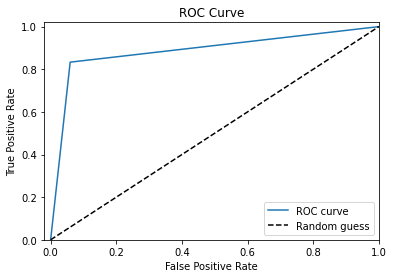

In [65]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

fpr, tpr, thresholds = roc_curve(y_val, y_pred)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")

In [67]:
y_pred = model.predict([[2, 146, 147],
 [1 ,188 ,65]])
y_pred
for i in y_pred:
  if i == '1':
    print("Follow Strict Diet")
  else:
    print("No Strict Diet")

Follow Strict Diet
No Strict Diet
